# Entendimiento de los datos

Para ilustrar el proceso de entendimiento de los datos, vamos a utilizar el dataset mas conocido y estudiado del aprendizaje automático (el "hola mundo" de la analítica): el dataset de flores Iris.
Este consta de 150 instancias de flores, clasificadas en 3 categorías posibles (iris-virginica, iris-setosa, iris-versicolor, cada una con 50 instancias), descritas a partir de 4 atributos (largo y ancho del pétalo, largo y ancho del sépalo).

Importamos las librerías que vamos a utilizar

**EXPLICACIÓN**: Se importan las librerias a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
from sklearn import datasets
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

Vamos a ignorar los warnings que no son importantes para lo que vamos a hacer

**EXPLICACIÓN**: Se decide omitir/ignorar las warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos para entenderlos

**EXPLICACIÓN**: Se utiliza la clase datasets para cargar el dataset Iris y se despliega el tipo de dicho dataset

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

## Preparación de la estructura de datos

El dataset esta guardado en una clase de scikit-learn llamada Bunch, que contiene el dataset en una estructura de directorio (duplas llave-valor). 

**EXPLICACIÓN**: Se despliegan las llaves del objeto iris, en el cual se almacena el set de datos cargado

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Podemos acceder a los datos de dos maneras, ya sea con los nombres de los campos en un array o como variables miembro:

**EXPLICACIÓN**: Se accede a los nombres de las etiquetas del set de datos.

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**EXPLICACIÓN**: Se muestra el nombre de las variables independientes y la forma de las mismas (numero de filas y numero de columnas). Adicionalmente se muestran las etiquetas junto a la forma de las mismas (numero de filas y numero de columnas)

In [7]:
print("variables independientes: ", iris.feature_names, iris.data.shape)
print("categorías de la variable dependiente: ", iris.target_names, iris.target.shape)

variables independientes:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)
categorías de la variable dependiente:  ['setosa' 'versicolor' 'virginica'] (150,)


Vamos a poner los datos en una estructura más manejable (numpy ndarray)

**EXPLICACIÓN**: Se separan las variables independientes de la dependiente (x, y respectivamente) y se imprime en consola el tipo de las dos variables generadas.

In [8]:
x = iris.data
y = iris.target
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**EXPLICACIÓN**: Se imprime la variable (y), la cual es la variable dependiente donde se encuentran guardadas las etiquetas para cada uno de los 150 registros en forma de factor/variable dummy (Asignacion numerica que representa variables categoricas)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

La variable categórica esta en un array de una sola fila.  Vamos a ponerla en una columna con varias filas para poder luego concatenarla con los datos de las variables independientes.

**EXPLICACIÓN**: Se convierte el vector (y) que originalmente es un vector fila a un vector columna.

In [10]:
y = np.expand_dims(y, axis=1)
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

Si por el contrario quisieramos poner una columna en una sola fila, podemos utilizar squeeze. A continuación mostramos su uso, pero no vamos a asignar la salida a la variable **y**

**EXPLICACIÓN**: Se convierte el vector columna (y) a un vector fila 

In [11]:
np.squeeze(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Creamos una sola estructura matricial con todos los datos.

**EXPLICACIÓN**: Se realiza la concatenacion horizontal de los vectores de las variables independientes (x) y el de la variable dependiente (y) obteniendose el arreglo de numpy data

In [12]:
data = np.concatenate((x, y), axis = 1)
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

Finalmente podemos crear una estructura **dataframe** para poder utilizar sus funcionalidades de manipulación de datos. Pongan atención al cambio del tipo de variable de *species* de entero a string.

**EXPLICACIÓN**: Se convierte el array del set de datos generado en el paso anterior a un dataframe de pandas, se extraen los nombres de las columnas de las variables independientes del dataset original agregandose ademas el nombre de la columna de la variable dependiente (species) y estos nombres de columnas finalmente se le ingresan al dataframe creado.

In [13]:
d = pd.DataFrame(data)
labels = iris.feature_names.copy()

In [14]:
labels

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
labels.append('species')

In [16]:
labels

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [17]:
d.columns=labels

**EXPLICACIÓN**: Se convierte la columna species en una variable del tipo numerica y posteriormente se convierte a cadena de texto.

In [18]:
d['species'] = d['species'].astype(int).astype('str')
#str(d['species'])

Veamos los primeros 5 registros del dataframe

**EXPLICACIÓN**: Se muestran los primeros 5 registros del dataframe creado.

In [19]:
d[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Vamos a cambiar los nombres de las columnas para que no queden con espacios

**EXPLICACIÓN**: Se cambia los nombres de las columnas del dataframe d para que estos no tengan espacios.

In [20]:
d.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
d[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Con un dataframe podemos acceder a los datos de las variables (columnas) a manera de diccionario:

**EXPLICACIÓN**: Se muestran diferentes maneras de acceder a los datos almacenados en cada columna como lo es la manera de dicconario, a manera de miembro, obteniendo un nuevo dataframe solo con los datos de dicha columna, usando indices mediante la funcion iloc o loc

In [21]:
d["sepal_width"][0:5]

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

A manera de variable miembro

In [22]:
d.sepal_width[0:5]

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

Obteniendo un nuevo dataframe solo con la columna en cuestión

In [23]:
d[["sepal_width"]][0:5]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


usando indices con iloc (devuelve un dataframe)

In [24]:
d.iloc[0:5:,[1]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [25]:
d.loc[0:5:,["sepal_width"]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9


O si queremos hacer subconjuntos teniendo en cuenta valores, usamos loc. Pör ejemplo si queremos los registros de una de las clases en particular.

**EXPLICACIÓN**: Se obtiene los nombres de las etiquetas.

In [26]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**EXPLICACIÓN**: Se seleccionan los primeros 5 registros de los registros que pertenezcan a la specie 0.

In [27]:
#setosa="0"
d.loc[d.species=="0"][0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para un futuro uso, vamos a crear un map que asocie una categoría con el índice correspondiente

**EXPLICACIÓN**: Se contruye un diccionario que permita mapear los factores (0,1 y 2) con su etiqueta correspondiente

In [28]:
categorias = dict(zip(["0", "1", "2"],iris["target_names"]))
categorias

{'0': 'setosa', '1': 'versicolor', '2': 'virginica'}

## Exploración de los datos

El método **head** permite obtener los primeros registros de un dataframe.

**EXPLICACIÓN**: Mediante el metodo head se obtienen los primeros n registros, en este caso n=3

In [29]:
d.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Aquí aparentemente tenemos valores numéricos en cada celda del dataframe, pero nosotros sabemos que la columna *species* es  la representación en cadena de caractéres (str) de los valores numéricos de las categorías: 'setosa'=0, 'versicolor'=1, 'virginica'=2.

El objeto **dtypes** indica las clases de las columnas del dataframe

**EXPLICACIÓN**: Mediante el metodo dtypes se obtienen los tipos de cada columna del dataframe

In [30]:
d.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Aquí confirmamos los tipos de las columnas de las variables independientes, y vemos como la variable dependiente se muestra como teniendo un tipo objeto (str es un tipo de objeto). Lo confirmamos a continuación.

**EXPLICACIÓN**: Se confirman los tipos de las columnas de dos formas, la primera es mediante el comando type (Solo se confirma el tipo del primer registro de la columna species) y la segunda mediante el comando info, el cual muestra los tipos de todas las columnas y adicionalmente muestra el numero total de filas y de columnas del dataframe y si existe la presencia de valores nulos en algunas de las columnas.

In [31]:
type(d.species[0])

str

El método **info** de un dataframe permite consultar información como el número de registros y de columnas con los tipos de datos correspondientes, el número de registros presentes (por oposición a los registros faltantes), y el tamaño que ocupa el dataframe en memoria.

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Aquí podemos:
- establecer el número de registros (150)
- confirmar que las cuatro variables independientes son numéricas, y que ninguna tiene valores faltantes, pues hay 150 valores presentes en cada una
- confirmar que la variables dependientes no es numérica (tipo object)

In [33]:
?d.describe

Signature:
d.describe(
    percentiles=None,
    include=None,
    exclude=None,
    datetime_is_numeric=False,
) -> 'NDFrameT'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the o

El método **describe** de un dataframe permite obtener un resumen de estadísticas descriptivas que permiten entender la distribución de cada variable.

**EXPLICACIÓN**: Mediante el metodo describe se obtiene un resumen estadistico del dataframe que incluye medidas de tendencia central y de dispersion, ademas de realizar un conteo y en el caso de variables categoricas, este permite obtener el numero de etiquetas unicas.

In [34]:
d.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Aquí podemos ver que:
- las cuatro primeras variables son numéricas (se pueden obtener percentiles, promedios y desviaciones estándar)
- el rango de estas variables no es el mismo para las variables. Particularmente podemos ver que 'petal width' tiene valores mas pequeños que 'sepal length' y que 'petal length' que presentan valores superiores.
- al comparar los promedios y percentil 50% de las variables podemos ver que 'petal length' presenta una diferencia bastante importante. Esto se puede explicar por distribución estirada hacia la izquierda o por unadistribución multimodal.
- la variable dependiente tiene 3 valores posibles, y que la categoría mas representativa es la 0 (setosa), que aparece con una frecuencia de 50. Esto nos permite deducir que el dataset está balanceado con respecto a la varible objetivo, y que las 3 clases aparecen en 50 registros cada una

En definitiva, para poder una idea más clara de las distribuciones de las variables, lo más indicado es utilizar visualizaciones.

## Visualizaciones

Vamos a utilizar la librería **seaborn**, que es una extensión de la librería **matplotlib**.

### Gráfico de barras

Lo primero que vamos a hacer es inicializar los objetos figura y ejes vacíos. Estos dos objetos deben estar en la misma celda del jupyter notebook que los lugares donde se utilizan.
Analizamos la distribución de las frecuencias de la variable categórica dependiente, utilizando un gráfico de barras de conteo.

In [35]:
d.columns[4]

'species'

**EXPLICACIÓN**: Se efectua el grafico de barras, donde se visualiza el conteo de los registros que pertenecen a cada una de las especies o categorias/etiquetas, que para este caso son 3 (setosa, versicolor y virginica). Este permite confirmar que el set de datos esta balanceado debido a que cada especie/etiqueta posee el mismo numero de registros asociados.

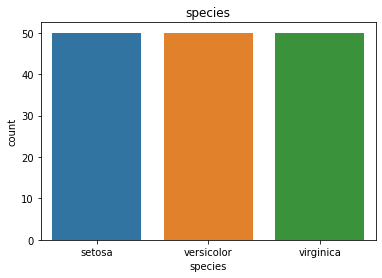

In [36]:
fig, ax = plt.subplots()
sns.countplot(x=d.columns[4], data=d)
plt.title(d.columns[4])
ax.set_xticklabels(iris.target_names)

plt.show()

Confirmamos así que el dataset está balanceado en cuanto a la variable dependiente, con 50 instancias para cada categoría.

### Boxplots

Ahora vamos a analizar las variables independientes.

Lo boxplots proporcionan una manera visual de entender las distribuciones de las variables numéricas, agregando además información estadística de las mismas, permitiendo el condicionamiento de los registros con respecto a una variable categórica.

**EXPLICACIÓN**: Se efectua el diagrama de caja para analizar las variables independientes para cada etiqueta o especie en este caso, el cual permite que se pueda observar si existen datos atipicos y ademas permite visualizar la mediana, los cuartiles Q1 y Q3 junto con el rango intercuartil de los mismos.
En estos graficos se puede analizar como la especie virginica posee por lo general valores mas elevados en cuanto su longitud del sepalo y del petalo, y tambien en cuanto su ancho del petalo a diferencia de las demas especies.

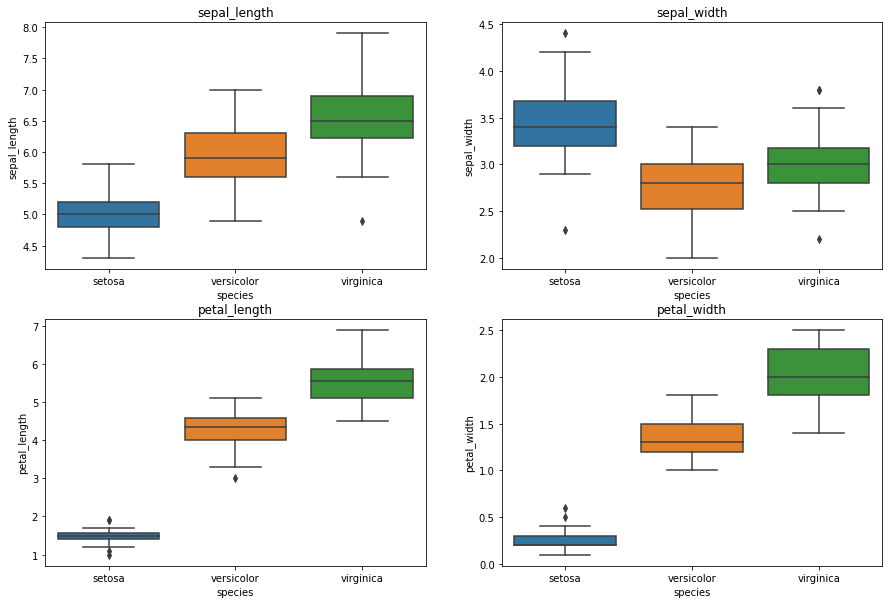

In [37]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(x=d.columns[4], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(iris.target_names)
    i+=1

### Gráfico de violín

Un plot de **violin** permite analizar también la distribución de una variable numérica independientemente de las demás, combinando un boxplot con un gráfico de densidad.

**EXPLICACIÓN**: Se efectua un diagrama de violin para la variable petal_length, donde se combinan las caracteristicas de una diagrama de caja con el de un grafico de densidad, permitiendo asi que se pueda visualizar el rango intercuartil y ademas la distribucion de los datos de dicha variable. En este caso se logra observar que la variable petal_length posee una distribucion binomial.

In [38]:
d.columns[4]

'species'

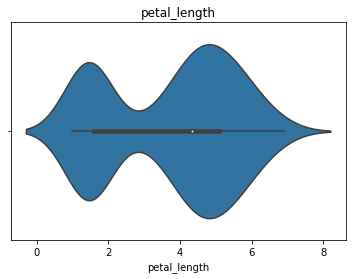

In [39]:
fig, ax = plt.subplots()
colname = d.columns[2]
sns.violinplot(x=colname, data=d)
plt.title(colname)

# Show the plot
plt.show()

Podemos ver, como lo sospechábamos al obtener las estadísticas descriptivas, que la variable 'petal length' presenta una distribución bimodal. Este plot además incluye un boxplot interno que muestra la mediana con un punto blanco y el percentil 25% y 75%.

En una misma figura podemos tener los plots de las 4 variables independientes. Esto lo logramos especificando los ejes de cada imágen. También podemos modificar el tamaño global de la figura.

Vamos a iterar en el dataframe con un ciclo que recorre las 4 variables numéricas, creando los plots correspondientes

**EXPLICACIÓN**: Se obtiene en una misma grafica los diagramas de violin para cada una de las variables independientes sin importar especie/categoria.

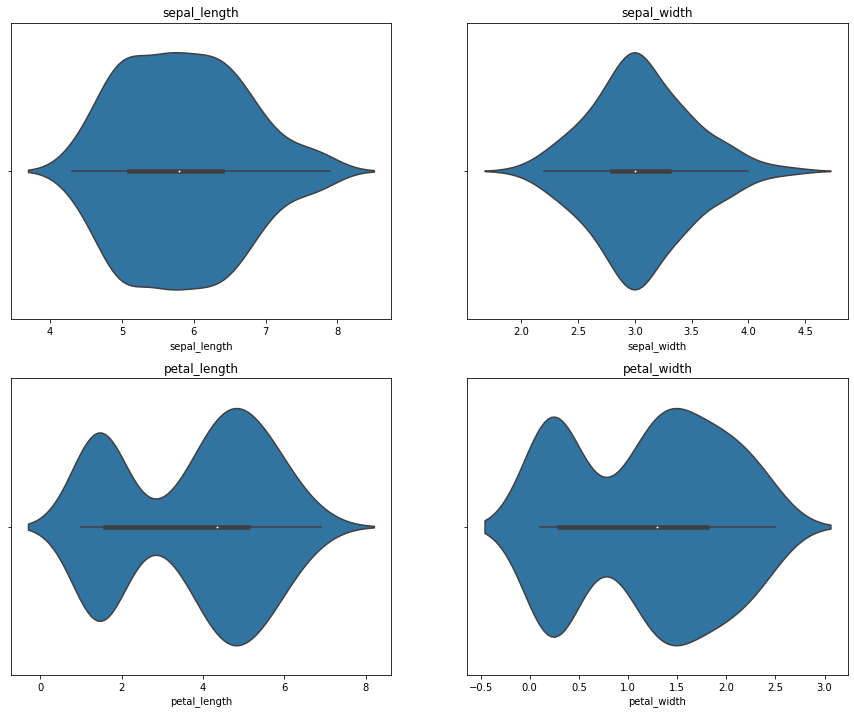

In [40]:
fig = plt.figure(figsize=(15,12))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.violinplot(x=var_num, data=d)
    plt.title(var_num)
    i+=1

Vemos que las variables tienen distribuciones muy diferentes. Sería mucho más informativo desde el punto de vista de la clasificación de la variable dependiente, poder tener una idea de la distribución de las variables independientes con respecto a cada categoría.
Esto lo logramos fácilmente poniendo una variable que controle el color (hue=matiz):

**EXPLICACIÓN**: Se realiza en una misma figura los diagramas de caja para cada variable independiente esta vez con respecto a cada categoria, en el cual se puede destacar el hecho de que la especie setosa presenta la menor dispersion/varianza en cuanto a su longitud del sepalo, longitud del petalo y ancho del petalo respecto a las demas especies, mostrando una tendencia a distribuciones leptocurticas.

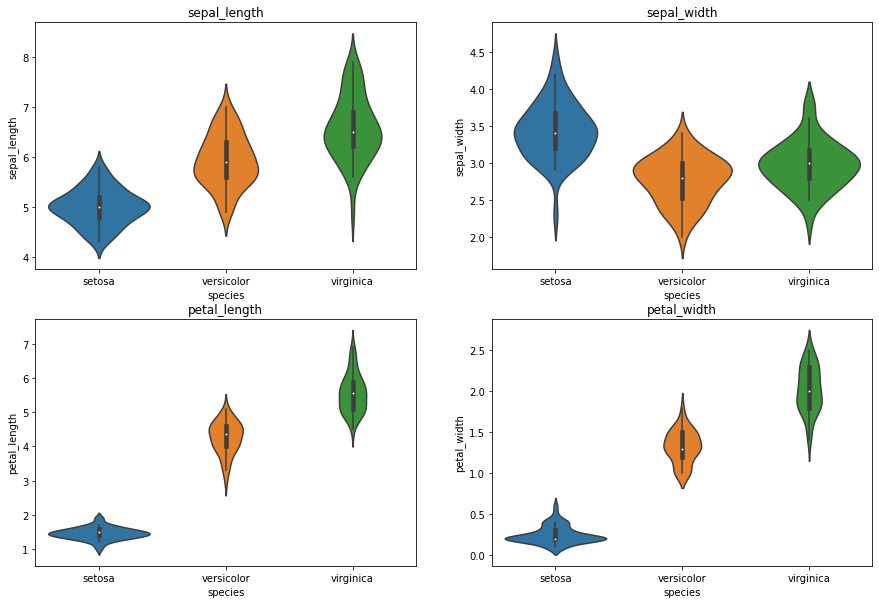

In [41]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.violinplot(x=d.columns[4], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(iris.target_names)
    i+=1

### Gráfico de densidades

Otra manera de ver información en un eje numérico univariado es analizando las distribuciones superpuestas. El plot KDE utiliza estimaciones de Kernel (no paramétricas) de cómo sería una distribución univariada o bivariada de un conjunto de datos.

**EXPLICACIÓN**: Se realiza el diagrama de densidad para la variable independiente petal_width con respecto a cada especie/categoria, donde se observa que la especie setosa presenta los valores mas bajos de esta variable, siendo la mas diferente entre las 3 especies.

In [43]:
setosa = d.loc[d.species == "0"]
virginica = d.loc[d.species == "1"]
versicolor = d.loc[d.species == "2"]


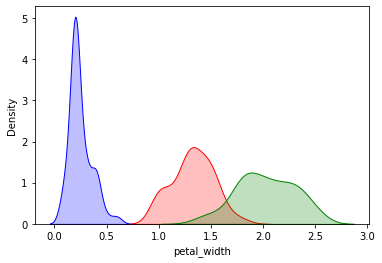

In [44]:
#ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(setosa.petal_width, shade=True, color="b")
ax = sns.kdeplot(virginica.petal_width, shade=True, color="r")
ax = sns.kdeplot(versicolor.petal_width, shade=True, color="g")

**EXPLICACIÓN**: Se realiza en una misma figura el diagrama de densidad para cada una de las variables independientes por categoria/especie, donde se observa que las variables petal_width y petal_length son las que mejor ayudan clasificar las diferentes especies puesto que las distribuciones poseen una buena separacion entre si.

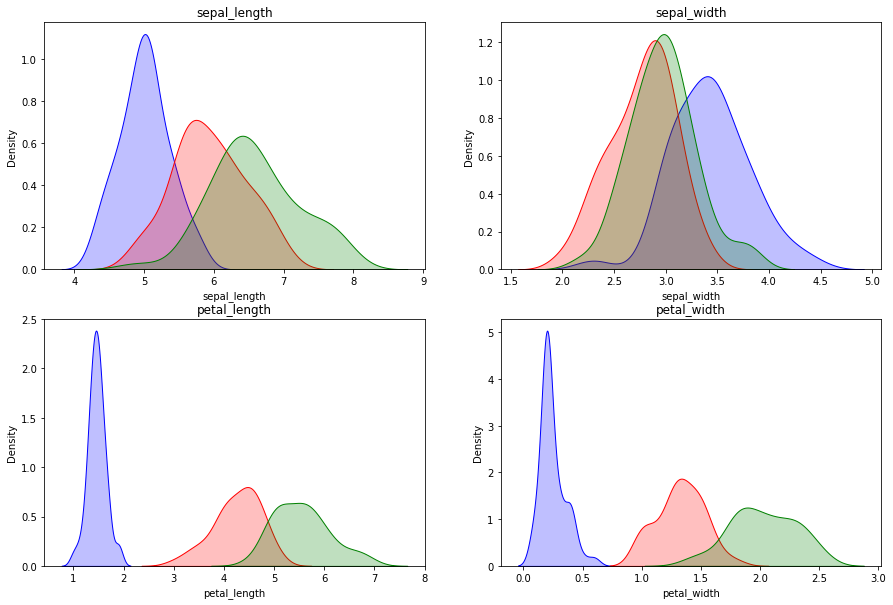

In [45]:
x=0
y=0
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)
for var_num in d.columns[0:4]:
    sns.kdeplot(setosa[[var_num]].iloc[:,0], shade=True, color="b", ax=axs[y,x], label="setosa")
    sns.kdeplot(virginica[[var_num]].iloc[:,0], shade=True, color="r", ax=axs[y,x], label="virginica")
    sns.kdeplot(versicolor[[var_num]].iloc[:,0], shade=True, color="g", ax=axs[y,x], label="versicolor")
    axs[y,x].set_title(var_num)
    if x==0:
        x=1
    else:
        y=1
        x=0

A partir del análisis univariado, podemos ver que las mejores variables desde el punto de vista de discriminación de las clases de la variable objetivo son petal_width y petal_length. 

Vamos a analizar las distribuciones bivariadas de estas dos variables.

**EXPLICACIÓN**: Se realiza el gráfico de estimación de la distribución del kernel o KDEPlot para cada una de las variables independientes por categoria/especie, donde ademas que permitir visualizar las relaciones de linealidad que puedan existir entre pares de variables, es posible observarse las distribucion de las observaciones como en un diagrama de densidad.

Text(0.5, 1.0, 'Petal length vs. sepal length')

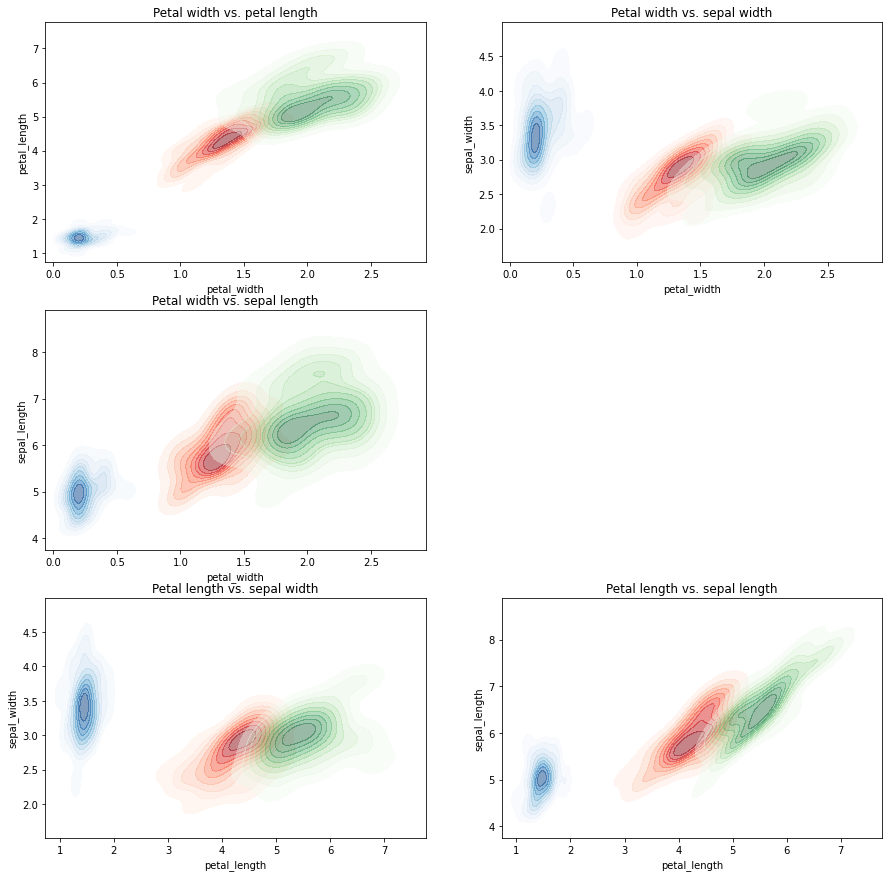

In [46]:
fig, axs = plt.subplots(figsize=[15, 15], ncols=2, nrows=3)

ax = sns.kdeplot(virginica.petal_width, virginica.petal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[0,0])
ax = sns.kdeplot(versicolor.petal_width, versicolor.petal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[0,0])
ax = sns.kdeplot(setosa.petal_width, setosa.petal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[0,0])
ax.set_title("Petal width vs. petal length")

ax = sns.kdeplot(virginica.petal_width, virginica.sepal_width, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[0,1])
ax = sns.kdeplot(versicolor.petal_width, versicolor.sepal_width, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[0,1])
ax = sns.kdeplot(setosa.petal_width, setosa.sepal_width, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[0,1])
ax.set_title("Petal width vs. sepal width")

ax = sns.kdeplot(virginica.petal_width, virginica.sepal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[1,0])
ax = sns.kdeplot(versicolor.petal_width, versicolor.sepal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[1,0])
ax = sns.kdeplot(setosa.petal_width, setosa.sepal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[1,0])
ax.set_title("Petal width vs. sepal length")


# No quiero mostrar el gráfico de la segunda fila y segunda columna
axs[1,1].get_yaxis().set_visible(False)
axs[1,1].get_xaxis().set_visible(False)
sns.despine(left=True, bottom=True, right=True, ax=axs[1,1])

ax = sns.kdeplot(virginica.petal_length, virginica.sepal_width, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[2,0])
ax = sns.kdeplot(versicolor.petal_length, versicolor.sepal_width, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[2,0])
ax = sns.kdeplot(setosa.petal_length, setosa.sepal_width, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[2,0])
ax.set_title("Petal length vs. sepal width")

ax = sns.kdeplot(virginica.petal_length, virginica.sepal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[2,1])
ax = sns.kdeplot(versicolor.petal_length, versicolor.sepal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[2,1])
ax = sns.kdeplot(setosa.petal_length, setosa.sepal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[2,1])
ax.set_title("Petal length vs. sepal length")

Con este tipo de plots bivariados, podemos eventualmente encontrar indicios de la capacidad predictiva de la interacción entre 2 variables, o confirmar los que pudimos obtener con una el análisis univariado.

### Scatter plots

Otra manera de ver las relaciones entre 2 variables es con scatter plots.

Vamos a ilustrar un particionamiento posible con los dataframes, usando el método *groupby*.

El método *groupby* retorna una tupla con la categoría de la variable particionada ("0", "1", "2"), y un dataframe con los dataframes de los registros correspondientes a cada categoría, incluyendo el índice de los registros correspondientes.

**EXPLICACIÓN**: Se realiza en una misma figura un grafico de dispersion y un grafico KDE, ambos relacionando las misma dos variables. Estos dos graficos muestran que existe una clara correlacion entre las variables petal_width y petal_length, siendo esta una relacion positiva.

Text(0.5, 1.0, 'Densidad de puntos: Petal width vs. petal length')

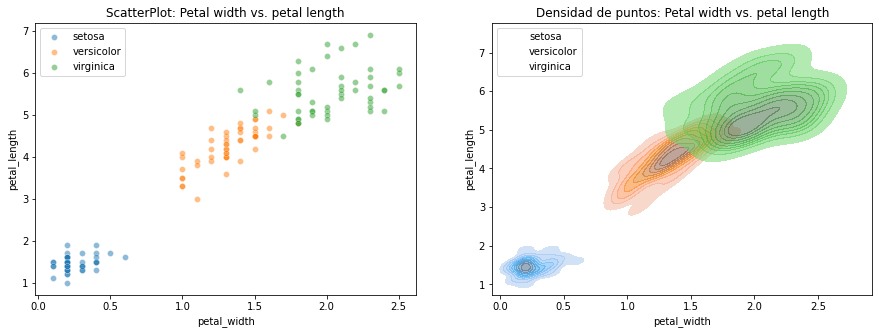

In [47]:
fig, axs = plt.subplots(figsize=[15, 5], ncols=2, nrows=1)

for name, group in d.groupby('species'):
    cat = categorias[name]
    sns.scatterplot(x="petal_width", y="petal_length", data=group, alpha=0.5, label=cat, ax=axs[0])    
axs[0].legend()
axs[0].set_title("ScatterPlot: Petal width vs. petal length")

for name, group in d.groupby('species'):
    cat = categorias[name]
    sns.kdeplot(data=group["petal_width"], data2=group["petal_length"], shade=True, shade_lowest=False, alpha=0.5,
                label=cat, ax=axs[1])    
axs[1].legend(loc=2)
axs[1].set_title("Densidad de puntos: Petal width vs. petal length")

### Pairplot

Un plot muy útil que resume el análisis univariado y el bivariado es el *pair plot*, que crea una matriz de plots con gráficos de densidad en la diagonal y scatterplots en las demás celdas.

**EXPLICACIÓN**: Se crear un grafico de pares, donde en la diagonal principal se expone el analisis univariado en forma de grafico de densidad, de las variables independientes separandolas por categorias y en las zona superior e inferior se realiza el analisis multivariado en forma de graficos de dispersion donde se posible visualizar correlaciones entre pares de variables y en este caso, se puede observar una fuerte relacion lineal positiva entre las variables petal_width y petal_length.

<Figure size 1080x1080 with 0 Axes>

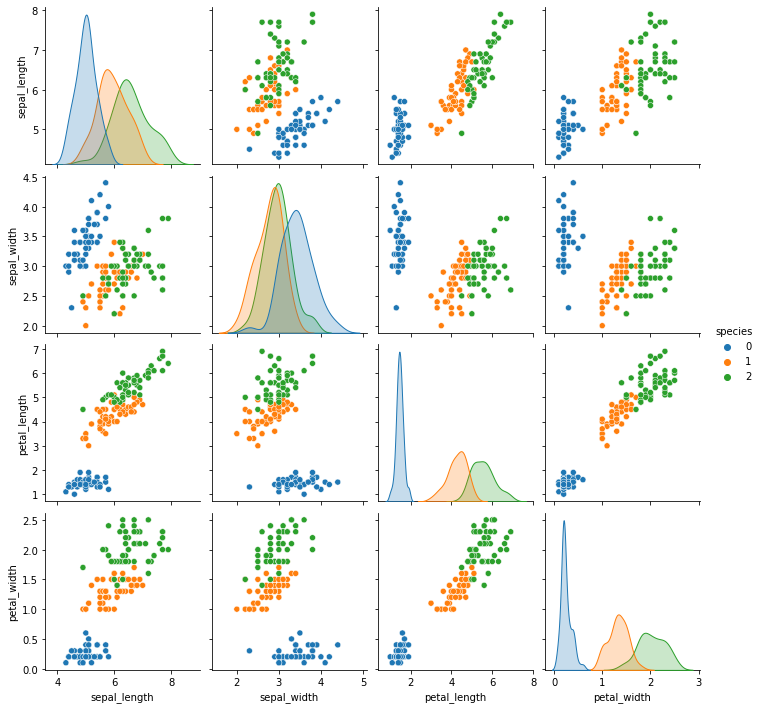

In [48]:
plt.figure(figsize=(15,15))
ax = sns.pairplot(d, hue="species")